In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
spectra_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_new_train.joblib')
spectra_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_test.joblib')
labels_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_new_train.joblib').reset_index()
labels_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_test.joblib').reset_index().drop(columns = ["index"])
labels_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_train.joblib').reset_index()
spectra_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_train.joblib')

In [4]:
size_regression_rf = joblib.load("RF Size Regression.joblib")[1]

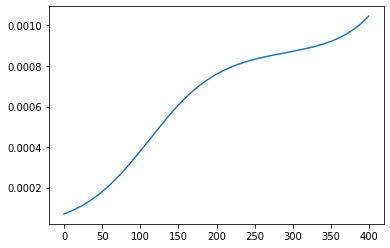

In [5]:
labels_test.iloc[7809]
plt.plot(spectra_test[7809])

In [6]:
inference_rf = joblib.load("inference_rf.joblib")

In [7]:
[np.asarray(labels_test.iloc[7809])]

[array([0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 4.53681668, 0.06424463, 0.06424463,
        0.06424463])]

In [8]:
log_emissivity = inference_rf.predict([np.asarray(labels_test.iloc[7809])])[0]

In [9]:
emissivity = []
for i in log_emissivity:
    emissivity.append(math.exp(i))

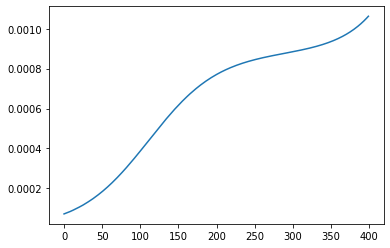

In [10]:
plt.plot(emissivity)

In [11]:
au_ns = np.asarray(labels_test.iloc[7809])

In [12]:
au_ns

array([0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 4.53681668, 0.06424463, 0.06424463,
       0.06424463])

In [72]:
def predict_spectrum_from_size_Au_NS(diameter):
    input_vector = [0,0,1,0,1,0,0]
    area = 4*np.pi*(diameter/2)**2
    volume = (4/3)*np.pi*(diameter/2)**3
    input_vector.append(np.log(area/volume))
    for i in range(0,3):
        input_vector.append(diameter)
    input_vector = [np.asarray(input_vector)]
    log_emissivity = inference_rf.predict(input_vector)[0]
    emissivity = []
    for i in log_emissivity:
        emissivity.append(math.exp(i))
    return emissivity

In [73]:
def predict_size_from_spectrum(spectrum, original_prediction = None):
    size_list = size_regression_rf.predict([spectrum])
    shortest_dim = size_list[0][1]
    if original_prediction != None:
        prediction_change = np.abs(shortest_dim - original_prediction)
        return(shortest_dim, prediction_change)
    if original_prediction == None:
        return(shortest_dim)

In [74]:
def generate_spheres(number_of_spheres, starting_diameter, increase_amount):
    spheres = [starting_diameter]
    for i in range(0, number_of_spheres):
        sphere = spheres[i] + increase_amount
        spheres.append(sphere)
    return(spheres)

In [75]:
# size_regression_rf.predict([emissivity_60nm])[0][1]

In [99]:
decreasing.reverse()

In [76]:
def sensitivity_analysis(number_of_spheres, starting_diameter, increase_amount):
    sphere_list = generate_spheres(number_of_spheres, starting_diameter, increase_amount)
    prediction_change_list = []
    original_prediction_spectrum = predict_spectrum_from_size_Au_NS(starting_diameter)
    original_prediction_size = predict_size_from_spectrum(original_prediction_spectrum)
    for sphere in sphere_list:
        spectrum = predict_spectrum_from_size_Au_NS(sphere)
        predictions = predict_size_from_spectrum(spectrum, original_prediction_size)
        prediction_change_list.append([sphere, predictions[0], predictions[1]])
        
    return prediction_change_list

In [79]:
increasing = sensitivity_analysis(10, 0.08, 0.001)
increasing

[[0.08, 0.08046282636560707, 0.0],
 [0.081, 0.07540404957308666, 0.005058776792520411],
 [0.082, 0.081916129542617, 0.0014533031770099236],
 [0.083, 0.0824112122492234, 0.0019483858836163298],
 [0.084, 0.08235761724241622, 0.0018947908768091465],
 [0.085, 0.08453804025228548, 0.0040752138866784055],
 [0.08600000000000001, 0.08607702506213548, 0.005614198696528405],
 [0.08700000000000001, 0.08583850869526778, 0.005375682329660708],
 [0.08800000000000001, 0.08713981528203923, 0.006676988916432161],
 [0.08900000000000001, 0.08808452600467458, 0.007621699639067503],
 [0.09000000000000001, 0.08949952104975235, 0.00903669468414528]]

In [78]:
increasing[0][0]

0.08

In [110]:
inputted_size = []
for i in range(0, len(decreasing)-1):
    inputted_size.append(decreasing[10-i][0]*1000)
for entry in increasing:
    inputted_size.append(entry[0]*1000)
inputted_size

[69.99999999999999,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.00000000000001,
 88.00000000000001,
 89.00000000000001,
 90.00000000000001]

In [111]:
change_from_original = []
for i in range(0, len(decreasing)-1):
    change_from_original.append(decreasing[10-i][2]*-1000)
for entry in increasing:
    change_from_original.append(entry[2]*1000)
change_from_original

[-10.791092407165346,
 -10.140880147887692,
 -9.540278663391938,
 -9.065969656224567,
 -7.955535717487402,
 -7.460531955104321,
 -6.872123066396771,
 -4.087502481712829,
 -3.0507191505331486,
 -3.9395525613113715,
 0.0,
 5.058776792520411,
 1.4533031770099236,
 1.94838588361633,
 1.8947908768091466,
 4.075213886678405,
 5.614198696528405,
 5.375682329660708,
 6.676988916432161,
 7.6216996390675025,
 9.03669468414528]

In [112]:
true_difference = list(np.arange(-10,11,1))
true_difference

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0.5, 1.0, 'Sensitivity of Au NS Prediction')

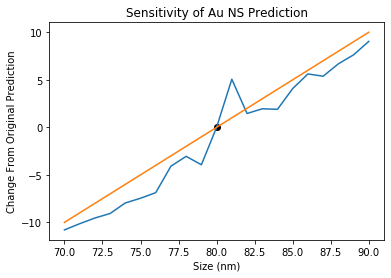

In [118]:
plt.plot(inputted_size, change_from_original)
plt.plot(inputted_size, true_difference)
plt.scatter(80,0, color = 'k')
plt.xlabel("Size (nm)")
plt.ylabel("Change From Original Prediction")
plt.title("Sensitivity of Au NS Prediction")

In [107]:
decreasing = sensitivity_analysis(10, 0.08, -0.001)
decreasing
#sensitivity_decreasing = decreasing[0]
#prediction_size_decreasing = decreasing[1]

[[0.08, 0.08046282636560707, 0.0],
 [0.079, 0.0765232738042957, 0.003939552561311371],
 [0.078, 0.07741210721507392, 0.003050719150533149],
 [0.077, 0.07637532388389424, 0.004087502481712829],
 [0.076, 0.0735907032992103, 0.006872123066396771],
 [0.075, 0.07300229441050275, 0.007460531955104321],
 [0.074, 0.07250729064811967, 0.007955535717487403],
 [0.073, 0.0713968567093825, 0.009065969656224568],
 [0.072, 0.07092254770221514, 0.009540278663391938],
 [0.071, 0.07032194621771938, 0.010140880147887693],
 [0.06999999999999999, 0.06967173395844173, 0.010791092407165345]]

In [168]:
test_spectrum = predict_spectrum_from_size_Au_NS(0.079)
test_size = predict_size_from_spectrum(test_spectrum)

In [169]:
test_spectrum_2 = predict_spectrum_from_size_Au_NS(0.08)

0.08046282636560707

In [170]:
test_spectrum_3 = predict_spectrum_from_size_Au_NS(0.078)

0.07741210721507392

In [171]:
test_spectrum_4 = predict_spectrum_from_size_Au_NS(0.081)

0.07540404957308666

In [172]:
test_spectrum_5 = predict_spectrum_from_size_Au_NS(0.082)
test_spectrum_6 = predict_spectrum_from_size_Au_NS(0.07)
test_spectrum_7 = predict_spectrum_from_size_Au_NS(0.09)

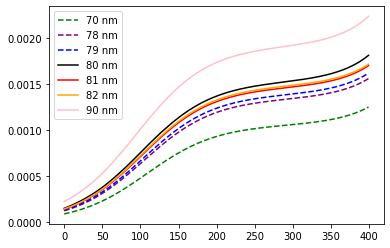

In [173]:
plt.plot(test_spectrum_6, color = 'green', linestyle = '--')
plt.plot(test_spectrum_3, color = 'purple', linestyle = '--')
plt.plot(test_spectrum, color = 'blue', linestyle = '--')
plt.plot(test_spectrum_2, color = 'k')
plt.plot(test_spectrum_4, color = 'red')
plt.plot(test_spectrum_5, color = 'orange')
plt.plot(test_spectrum_7, color = 'pink')

plt.legend(labels = ["70 nm", "78 nm", "79 nm", "80 nm", "81 nm", "82 nm", "90 nm"]) # use list of legend names to create the legend


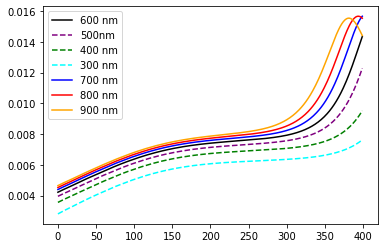

In [188]:
test_spectrum_5 = predict_spectrum_from_size_Au_NS(0.6)
test_spectrum_6 = predict_spectrum_from_size_Au_NS(0.5)
test_spectrum_7 = predict_spectrum_from_size_Au_NS(0.4)
test_spectrum_70 = predict_spectrum_from_size_Au_NS(0.3)
test_spectrum_8 = predict_spectrum_from_size_Au_NS(0.7)
test_spectrum_9 = predict_spectrum_from_size_Au_NS(0.8)
test_spectrum_10 = predict_spectrum_from_size_Au_NS(0.9)
test_spectrum_11 = predict_spectrum_from_size_Au_NS(1)
plt.plot(test_spectrum_5, color = 'black')
plt.plot(test_spectrum_6, color = 'purple', linestyle = '--')
plt.plot(test_spectrum_7, color = 'green', linestyle = '--')
plt.plot(test_spectrum_70, color = 'cyan', linestyle = '--')
plt.plot(test_spectrum_8, color = 'blue')
plt.plot(test_spectrum_9, color = 'red')
plt.plot(test_spectrum_10, color = 'orange')
plt.legend(labels = ["600 nm", "500nm", "400 nm", "300 nm", "700 nm", "800 nm", "900 nm"]) # use list of legend names to create the legend


In [63]:
#diff = []
#for i in range(0, len(test_spectrum)):
    #diff.append(np.abs(test_spectrum[i] - test_spectrum_2[i]))
#print(diff)

In [117]:
decreasing_2 = sensitivity_analysis(100, 0.08, -0.0001)
increasing_2 = sensitivity_analysis(100, 0.08, 0.0001)

In [120]:
inputted_size_2 = []
for i in range(0, len(decreasing_2)-1):
    inputted_size_2.append(decreasing_2[100-i][0]*1000)
for entry in increasing_2:
    inputted_size_2.append(entry[0]*1000)
inputted_size_2

[69.99999999999972,
 70.09999999999972,
 70.19999999999972,
 70.29999999999973,
 70.39999999999972,
 70.49999999999973,
 70.59999999999974,
 70.69999999999973,
 70.79999999999974,
 70.89999999999974,
 70.99999999999974,
 71.09999999999975,
 71.19999999999975,
 71.29999999999976,
 71.39999999999975,
 71.49999999999976,
 71.59999999999977,
 71.69999999999976,
 71.79999999999977,
 71.89999999999976,
 71.99999999999977,
 72.09999999999978,
 72.19999999999978,
 72.29999999999978,
 72.39999999999978,
 72.49999999999979,
 72.5999999999998,
 72.69999999999979,
 72.7999999999998,
 72.89999999999979,
 72.9999999999998,
 73.09999999999981,
 73.1999999999998,
 73.29999999999981,
 73.3999999999998,
 73.49999999999982,
 73.59999999999982,
 73.69999999999982,
 73.79999999999983,
 73.89999999999982,
 73.99999999999983,
 74.09999999999984,
 74.19999999999983,
 74.29999999999984,
 74.39999999999984,
 74.49999999999984,
 74.59999999999985,
 74.69999999999985,
 74.79999999999986,
 74.89999999999985,
 74.9

In [122]:
change_from_original_2 = []
for i in range(0, len(decreasing_2)-1):
    change_from_original_2.append(decreasing_2[100-i][2]*-1000)
for entry in increasing_2:
    change_from_original_2.append(entry[2]*1000)
change_from_original_2

[-10.791092407165346,
 -10.48388103530122,
 -10.48388103530122,
 -10.48388103530122,
 -10.48388103530122,
 -10.29817974863241,
 -10.29817974863241,
 -10.247031946418641,
 -10.247031946418641,
 -10.140880147887692,
 -10.140880147887692,
 -10.140880147887692,
 -10.140880147887692,
 -9.841399962982722,
 -9.841399962982722,
 -9.841399962982722,
 -9.841399962982722,
 -9.571031409653013,
 -9.540278663391938,
 -9.540278663391938,
 -9.540278663391938,
 -8.82565600106501,
 -8.82565600106501,
 -8.82565600106501,
 -8.82565600106501,
 -8.82565600106501,
 -9.065969656224567,
 -9.065969656224567,
 -9.065969656224567,
 -9.065969656224567,
 -9.065969656224567,
 -9.065969656224567,
 -9.16130752501007,
 -9.16130752501007,
 -9.828527083838523,
 -10.065068736157812,
 -10.065068736157812,
 -10.065068736157812,
 -9.319213535054368,
 -8.318137804777137,
 -7.955535717487402,
 -7.955535717487402,
 -7.760581795372937,
 -7.874176590207643,
 -7.979935920642708,
 -7.979935920642708,
 -7.979935920642708,
 -7.460531

In [126]:
true_difference_2 = list(np.arange(-10,10.1,0.1))

[-10.0,
 -9.9,
 -9.8,
 -9.700000000000001,
 -9.600000000000001,
 -9.500000000000002,
 -9.400000000000002,
 -9.300000000000002,
 -9.200000000000003,
 -9.100000000000003,
 -9.000000000000004,
 -8.900000000000004,
 -8.800000000000004,
 -8.700000000000005,
 -8.600000000000005,
 -8.500000000000005,
 -8.400000000000006,
 -8.300000000000006,
 -8.200000000000006,
 -8.100000000000007,
 -8.000000000000007,
 -7.9000000000000075,
 -7.800000000000008,
 -7.700000000000008,
 -7.6000000000000085,
 -7.500000000000009,
 -7.400000000000009,
 -7.30000000000001,
 -7.20000000000001,
 -7.10000000000001,
 -7.000000000000011,
 -6.900000000000011,
 -6.800000000000011,
 -6.700000000000012,
 -6.600000000000012,
 -6.500000000000012,
 -6.400000000000013,
 -6.300000000000013,
 -6.2000000000000135,
 -6.100000000000014,
 -6.000000000000014,
 -5.900000000000015,
 -5.800000000000015,
 -5.700000000000015,
 -5.600000000000016,
 -5.500000000000016,
 -5.400000000000016,
 -5.300000000000017,
 -5.200000000000017,
 -5.10000000

Text(0.5, 1.0, 'Sensitivity of Au NS Prediction')

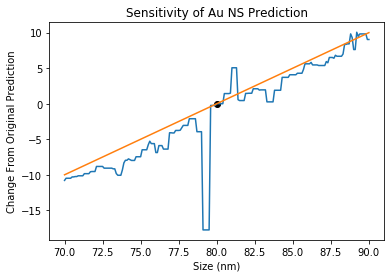

In [127]:
plt.plot(inputted_size_2, change_from_original_2)
plt.plot(inputted_size_2, true_difference_2)
plt.scatter(80,0, color = 'k')
plt.xlabel("Size (nm)")
plt.ylabel("Change From Original Prediction")
plt.title("Sensitivity of Au NS Prediction")

In [128]:
decreasing_3 = sensitivity_analysis(100, 0.1, -0.0001)
increasing_3 = sensitivity_analysis(100, 0.1, 0.0001)

In [129]:
inputted_size_3 = []
for i in range(0, len(decreasing_3)-1):
    inputted_size_3.append(decreasing_3[100-i][0]*1000)
for entry in increasing_3:
    inputted_size_3.append(entry[0]*1000)
inputted_size_3

change_from_original_3 = []
for i in range(0, len(decreasing_3)-1):
    change_from_original_3.append(decreasing_3[100-i][2]*-1000)
for entry in increasing_3:
    change_from_original_3.append(entry[2]*1000)
change_from_original_3

[-3.5941886956440823,
 -3.2295714831468008,
 -4.564829496161868,
 -2.2496742986520406,
 -0.7913085404416681,
 -0.7913085404416681,
 -0.7913085404416681,
 -0.7913085404416681,
 -0.7913085404416681,
 -0.7697027812150203,
 -0.7697027812150203,
 -0.7697027812150203,
 -4.903903731167613,
 -4.903903731167613,
 -4.903903731167613,
 -4.903903731167613,
 -4.903903731167613,
 -4.903903731167613,
 -4.903903731167613,
 -6.302449784636122,
 -0.16649277585861766,
 -0.16649277585861766,
 -0.16649277585861766,
 -0.16649277585861766,
 -0.7367141048030129,
 -0.7367141048030129,
 -0.7367141048030129,
 -0.7367141048030129,
 -0.7367141048030129,
 -0.7367141048030129,
 -0.1089443120251693,
 -0.1089443120251693,
 -0.1089443120251693,
 -0.1089443120251693,
 -0.1089443120251693,
 -0.376422997866957,
 -0.376422997866957,
 -0.39388027547232474,
 -0.39388027547232474,
 -0.39388027547232474,
 -0.28600868294421933,
 -0.6721642171463454,
 -0.6721642171463454,
 -0.6721642171463454,
 -0.6721642171463454,
 -0.672164217

Text(0.5, 1.0, 'Sensitivity of Au NS Prediction')

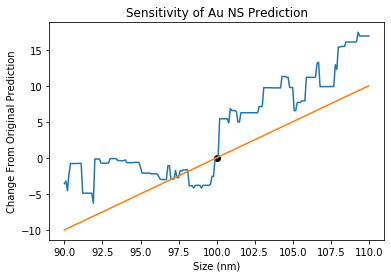

In [131]:
plt.plot(inputted_size_3, change_from_original_3)
plt.plot(inputted_size_3, true_difference_2)
plt.scatter(100,0, color = 'k')
plt.xlabel("Size (nm)")
plt.ylabel("Change From Original Prediction")
plt.title("Sensitivity of Au NS Prediction")

In [135]:
decreasing_4 = sensitivity_analysis(100, 0.6, -0.005)
increasing_4 = sensitivity_analysis(100, 0.6, 0.005)

In [138]:
inputted_size_4 = []
for i in range(0, len(decreasing_4)-1):
    inputted_size_4.append(decreasing_4[100-i][0]*1000)
for entry in increasing_4:
    inputted_size_4.append(entry[0]*1000)

change_from_original_4 = []
for i in range(0, len(decreasing_4)-1):
    change_from_original_4.append(decreasing_4[100-i][2]*-1000)
for entry in increasing_4:
    change_from_original_4.append(entry[2]*1000)

In [146]:
true_difference_4 = np.arange(-500,505,5)
true_difference_4

array([-500, -495, -490, -485, -480, -475, -470, -465, -460, -455, -450,
       -445, -440, -435, -430, -425, -420, -415, -410, -405, -400, -395,
       -390, -385, -380, -375, -370, -365, -360, -355, -350, -345, -340,
       -335, -330, -325, -320, -315, -310, -305, -300, -295, -290, -285,
       -280, -275, -270, -265, -260, -255, -250, -245, -240, -235, -230,
       -225, -220, -215, -210, -205, -200, -195, -190, -185, -180, -175,
       -170, -165, -160, -155, -150, -145, -140, -135, -130, -125, -120,
       -115, -110, -105, -100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,
        -60,  -55,  -50,  -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,
         -5,    0,    5,   10,   15,   20,   25,   30,   35,   40,   45,
         50,   55,   60,   65,   70,   75,   80,   85,   90,   95,  100,
        105,  110,  115,  120,  125,  130,  135,  140,  145,  150,  155,
        160,  165,  170,  175,  180,  185,  190,  195,  200,  205,  210,
        215,  220,  225,  230,  235,  240,  245,  2

Text(0.5, 1.0, 'Sensitivity of Au NS Prediction')

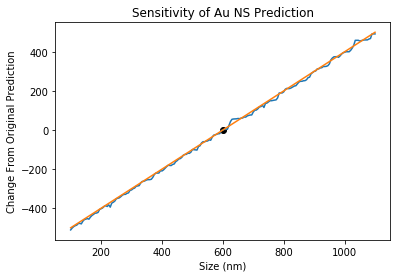

In [147]:
plt.plot(inputted_size_4, change_from_original_4)
plt.plot(inputted_size_4, true_difference_4)
plt.scatter(600,0, color = 'k')
plt.xlabel("Size (nm)")
plt.ylabel("Change From Original Prediction")
plt.title("Sensitivity of Au NS Prediction")